In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()
pwd

'f:\\Research\\WSe2\\Training\\Task2\\Thresholding'

In [3]:
df = pd.read_csv(pwd+"\\pixel_data_rgb.csv")
df

,Image,Layer,X,Y,Red,Green,Blue
0,1,Monolayer,40,28,117,121,125
1,1,Monolayer,45,35,115,120,125
2,1,Monolayer,41,32,115,120,124
3,1,Monolayer,38,29,115,120,123
4,1,Monolayer,40,32,115,120,124
...,...,...,...,...,...,...,...
463,20,Background,138,47,128,126,129
464,20,Background,104,26,127,126,129
465,20,Background,133,0,127,126,129
466,20,Background,110,43,127,126,129


In [4]:
df.duplicated().sum()

7

In [5]:
df = df.drop(df[df.duplicated()].index, inplace=False)
df.duplicated().sum()

0

In [6]:
sns.set_theme(style="ticks", rc={'font.weight': "bold"})

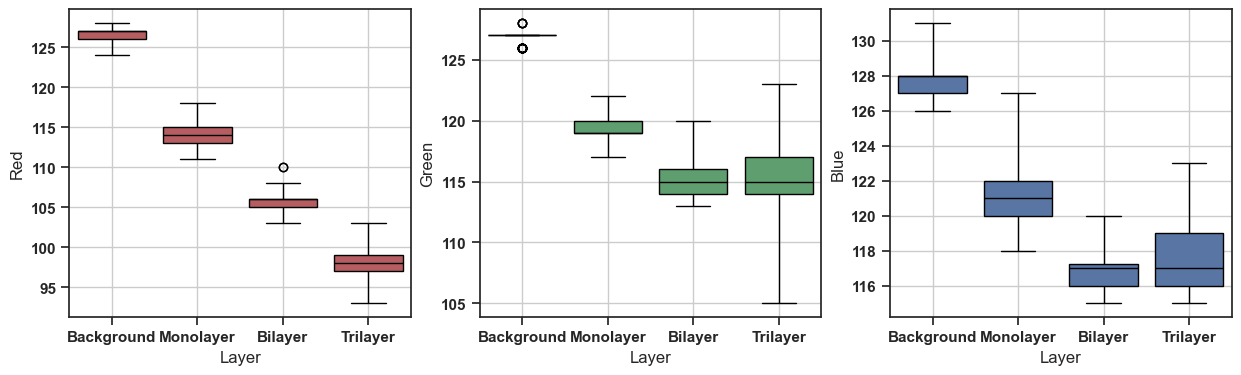

In [30]:
layer_order = ["Background", "Monolayer", "Bilayer", "Trilayer"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(data=df, x="Layer", y="Red", whis=3, order=layer_order, linecolor='black', color='r', ax=ax1)
sns.boxplot(data=df, x="Layer", y="Green", whis=3, order=layer_order, linecolor='black', color="g", ax=ax2)
sns.boxplot(data=df, x="Layer", y="Blue", whis=3, order=layer_order, linecolor='black', color="b", ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()

In [8]:
df_back = df[df["Layer"]=="Background"]
df_mono = df[df["Layer"]=="Monolayer"]
df_bi = df[df["Layer"]=="Bilayer"]
df_tri = df[df["Layer"]=="Trilayer"]

In [9]:
df_melted = pd.melt(df, id_vars="Layer", value_vars=["Red", "Green", "Blue"], 
                    var_name="Color Channel", value_name="Pixel Value")
df_melted

,Layer,Color Channel,Pixel Value
0,Monolayer,Red,117
1,Monolayer,Red,115
2,Monolayer,Red,115
3,Monolayer,Red,115
4,Monolayer,Red,115
...,...,...,...
1378,Background,Blue,129
1379,Background,Blue,129
1380,Background,Blue,129
1381,Background,Blue,129


In [10]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

col_pal = [rgb_to_hex(201, 255, 52), rgb_to_hex(241, 183, 23), rgb_to_hex(220, 110, 85)]
for i, l in enumerate(["Monolayer", "Bilayer", "Trilayer"]):
    print(l+":", col_pal[i])

Monolayer: #c9ff34
Bilayer: #f1b717
Trilayer: #dc6e55


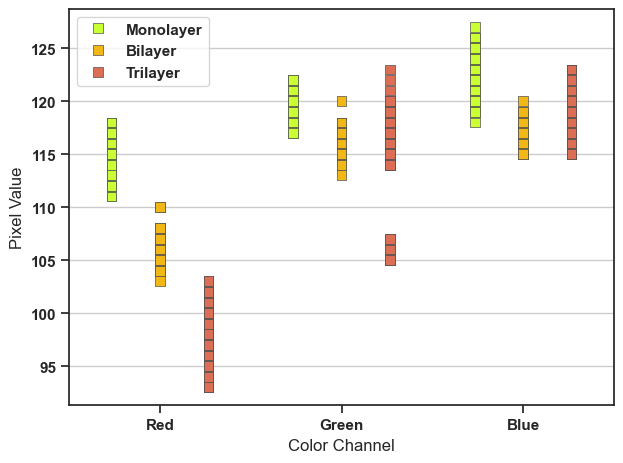

In [11]:
data = df_melted.drop(df_melted[df_melted["Layer"] == "Background"].index, inplace=False)

sns.stripplot(data=data, x="Color Channel", y="Pixel Value",
                hue="Layer", hue_order=["Monolayer", "Bilayer", "Trilayer"], size=7,
                dodge=True, jitter=False, linewidth=0.5, marker="s",
                palette=sns.color_palette(col_pal))
plt.grid(axis='y')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\px_vs_cch.png", dpi=600)

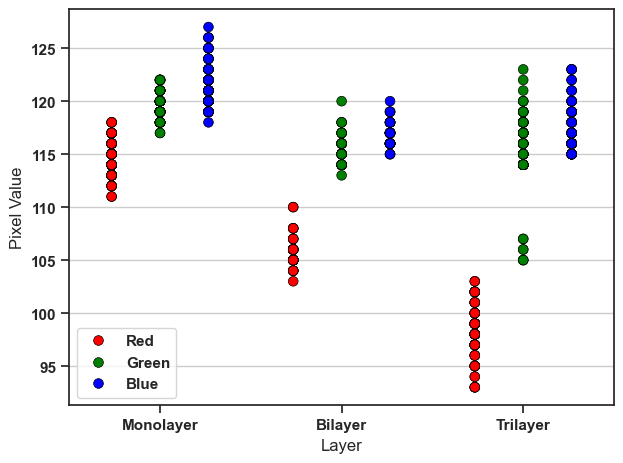

In [12]:
# Strip Plot
sns.stripplot(data=data, x="Layer", y="Pixel Value", hue="Color Channel", order=layer_order[1:], linewidth=0.5, size=7,
              palette=sns.color_palette(["Red", "Green", "Blue"]), edgecolor="black", dodge=True, jitter=False)
plt.grid(axis='y')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\px_vs_layer_range.png", dpi=600)
plt.show()

In [13]:
back_r_md, back_g_md, back_b_md = df_back.Red.median(), df_back.Green.median(), df_back.Blue.median()
mono_r_md, mono_g_md, mono_b_md = df_mono.Red.median(), df_mono.Green.median(), df_mono.Blue.median()
bi_r_md, bi_g_md, bi_b_md = df_bi.Red.median(), df_bi.Green.median(), df_bi.Blue.median()
tri_r_md, tri_g_md, tri_b_md = df_tri.Red.median(), df_tri.Green.median(), df_tri.Blue.median()

median_df = pd.DataFrame({
    "Layer": layer_order,
    "Red": [back_r_md, mono_r_md, bi_r_md, tri_r_md],
    "Green": [back_g_md, mono_g_md, bi_g_md, tri_g_md],
    "Blue": [back_b_md, mono_b_md, bi_b_md, tri_b_md]
})
median_df

,Layer,Red,Green,Blue
0,Background,127.0,127.0,128.0
1,Monolayer,114.0,119.0,121.0
2,Bilayer,106.0,115.0,117.0
3,Trilayer,98.0,115.0,117.0


In [14]:
channels = ["Red", "Green", "Blue"]
layer_dict = {"Background": df_back, "Monolayer": df_mono, "Bilayer": df_bi, "Trilayer": df_tri}
threshold_lst = []

for layer in layer_dict.keys():
    layer_df = layer_dict[layer]
    thresh = layer_df[channels].describe().loc[["min", "max"]].T
    thresh["Layer"] = [layer]*len(channels)
    threshold_lst.append(thresh)

In [15]:
threshold_df = pd.concat([*threshold_lst])
#threshold_df.reset_index(inplace=True)
#threshold_df.rename(columns={"min": "Min", "max": "Max"}, inplace=True)
threshold_df

,min,max,Layer
Red,124.0,128.0,Background
Green,126.0,128.0,Background
Blue,126.0,131.0,Background
Red,111.0,118.0,Monolayer
Green,117.0,122.0,Monolayer
Blue,118.0,127.0,Monolayer
Red,103.0,110.0,Bilayer
Green,113.0,120.0,Bilayer
Blue,115.0,120.0,Bilayer
Red,93.0,103.0,Trilayer


In [16]:
threshold_red = threshold_df.loc["Red"]
threshold_red.to_csv(pwd+"/threshold_red.csv")
threshold_red

,min,max,Layer
Red,124.0,128.0,Background
Red,111.0,118.0,Monolayer
Red,103.0,110.0,Bilayer
Red,93.0,103.0,Trilayer


In [17]:
threshold_green = threshold_df.loc["Green"]
threshold_green.to_csv(pwd+"/threshold_green.csv")
threshold_green

,min,max,Layer
Green,126.0,128.0,Background
Green,117.0,122.0,Monolayer
Green,113.0,120.0,Bilayer
Green,105.0,123.0,Trilayer


In [18]:
threshold_blue = threshold_df.loc["Blue"]
threshold_blue.to_csv(pwd+"/threshold_blue.csv")
threshold_blue

,min,max,Layer
Blue,126.0,131.0,Background
Blue,118.0,127.0,Monolayer
Blue,115.0,120.0,Bilayer
Blue,115.0,123.0,Trilayer


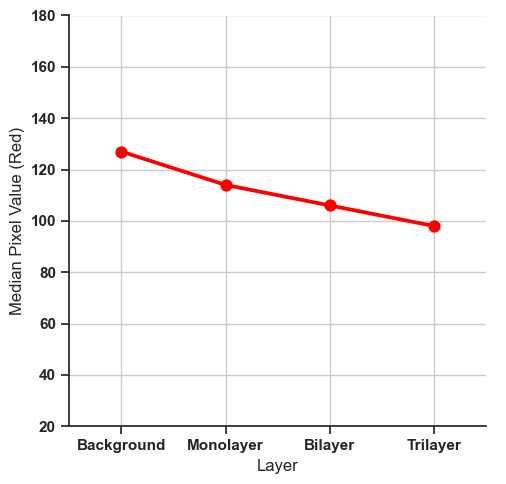

In [19]:
sns.catplot(data=median_df, x="Layer", y="Red", kind="point", color="Red", order=layer_order)
plt.grid()
plt.ylabel("Median Pixel Value (Red)")
plt.ylim(20, 180)
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\med_r_vs_layer.png", dpi=600)
plt.show()

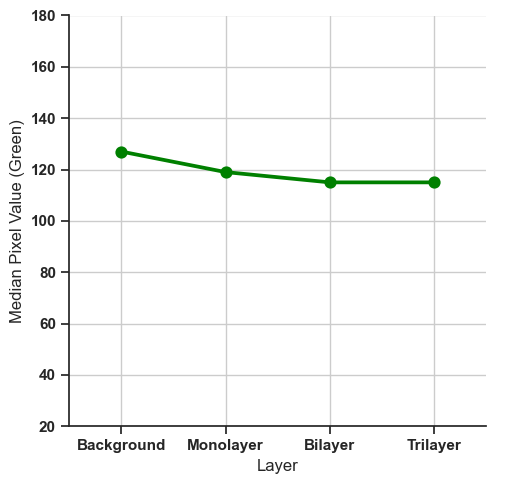

In [20]:
sns.catplot(data=median_df, x="Layer", y="Green", kind="point", color="Green", order=layer_order)
plt.grid()
plt.ylabel("Median Pixel Value (Green)")
plt.ylim(20, 180)
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\med_g_vs_layer.png", dpi=600)
plt.show()

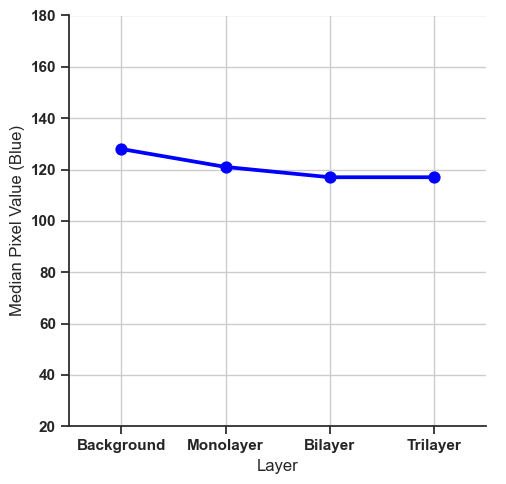

In [21]:
sns.catplot(data=median_df, x="Layer", y="Blue", kind="point", color="Blue", order=layer_order)
plt.grid()
plt.ylabel("Median Pixel Value (Blue)")
plt.ylim(20, 180)
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\med_b_vs_layer.png", dpi=600)
plt.show()

In [22]:
median_df_melted = pd.melt(median_df, id_vars=["Layer"], 
                           value_vars=["Red", "Green", "Blue"],
                           var_name="Color Channel",
                           value_name="Median Pixel Value")
median_df_melted

,Layer,Color Channel,Median Pixel Value
0,Background,Red,127.0
1,Monolayer,Red,114.0
2,Bilayer,Red,106.0
3,Trilayer,Red,98.0
4,Background,Green,127.0
5,Monolayer,Green,119.0
6,Bilayer,Green,115.0
7,Trilayer,Green,115.0
8,Background,Blue,128.0
9,Monolayer,Blue,121.0


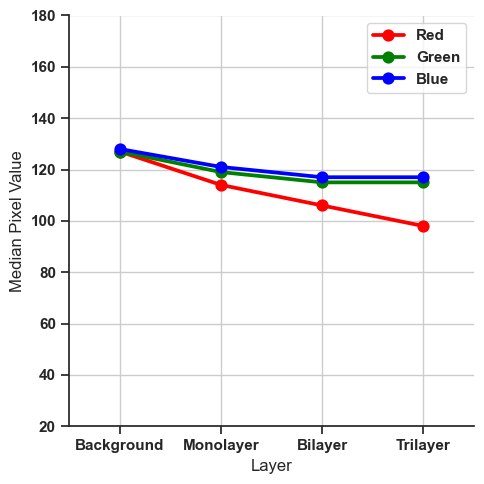

In [23]:
# all in one catplot of Median Pixel Values for each channel
sns.catplot(data=median_df_melted, x="Layer", y="Median Pixel Value", hue="Color Channel", order=layer_order,
            kind="point", palette=sns.color_palette(["Red", "Green", "Blue"]), legend_out=False)
plt.grid()
plt.ylim(20, 180)
plt.tight_layout()
plt.legend(loc='best')
#plt.savefig(pwd+"\\Plots\\Med_px_vs_layer.png", dpi=600)
plt.show()

In [24]:
# STD plots for each image for Monolayer
img_lst = df_mono.Image.unique().tolist()
r_sigmas = []
g_sigmas = []
b_sigmas = []

for i in img_lst:
    r_sigmas.append(df_mono[df_mono["Image"] == i].Red.std())
    g_sigmas.append(df_mono[df_mono["Image"] == i].Green.std())
    b_sigmas.append(df_mono[df_mono["Image"] == i].Blue.std())

std_df_mono = pd.DataFrame({
    "Image": img_lst,
    "Red": r_sigmas,
    "Green": g_sigmas,
    "Blue": b_sigmas
})
std_df_mono_melted = pd.melt(std_df_mono, id_vars="Image", value_vars=["Red", "Green", "Blue"], 
                             var_name="Color Channel", value_name="Standard Deviation")
std_df_mono_melted

,Image,Color Channel,Standard Deviation
0,1,Red,1.069045
1,3,Red,0.743223
2,4,Red,1.797434
3,5,Red,0.836660
4,6,Red,1.140175
5,7,Red,0.875595
6,10,Red,1.642081
7,11,Red,0.755929
8,12,Red,1.483240
9,13,Red,0.930949


In [25]:
# STD plots for each image for Bilayer
img_lst = df_bi.Image.unique().tolist()
r_sigmas = []
g_sigmas = []
b_sigmas = []

for i in img_lst:
    r_sigmas.append(df_bi[df_bi["Image"] == i].Red.std())
    g_sigmas.append(df_bi[df_bi["Image"] == i].Green.std())
    b_sigmas.append(df_bi[df_bi["Image"] == i].Blue.std())

std_df_bi = pd.DataFrame({
    "Image": img_lst,
    "Red": r_sigmas,
    "Green": g_sigmas,
    "Blue": b_sigmas
})
std_df_bi_melted = pd.melt(std_df_bi, id_vars="Image", value_vars=["Red", "Green", "Blue"], 
                             var_name="Color Channel", value_name="Standard Deviation")
std_df_bi_melted

,Image,Color Channel,Standard Deviation
0,1,Red,1.154701
1,7,Red,1.322876
2,8,Red,0.632456
3,16,Red,0.816497
4,19,Red,2.370453
5,1,Green,0.487950
6,7,Green,0.770281
7,8,Green,0.516398
8,16,Green,0.690066
9,19,Green,1.253566


In [26]:
# STD plots for each image for Trilayer
img_lst = df_tri.Image.unique().tolist()
r_sigmas = []
g_sigmas = []
b_sigmas = []

for i in img_lst:
    r_sigmas.append(df_tri[df_tri["Image"] == i].Red.std())
    g_sigmas.append(df_tri[df_tri["Image"] == i].Green.std())
    b_sigmas.append(df_tri[df_tri["Image"] == i].Blue.std())

std_df_tri = pd.DataFrame({
    "Image": img_lst,
    "Red": r_sigmas,
    "Green": g_sigmas,
    "Blue": b_sigmas
})
std_df_tri_melted = pd.melt(std_df_tri, id_vars="Image", value_vars=["Red", "Green", "Blue"], 
                             var_name="Color Channel", value_name="Standard Deviation")
std_df_tri_melted

,Image,Color Channel,Standard Deviation
0,1,Red,2.081666
1,2,Red,0.786796
2,3,Red,1.966384
3,4,Red,1.632993
4,5,Red,1.632993
5,6,Red,1.632993
6,7,Red,0.679366
7,13,Red,1.303840
8,14,Red,0.547723
9,15,Red,1.832251


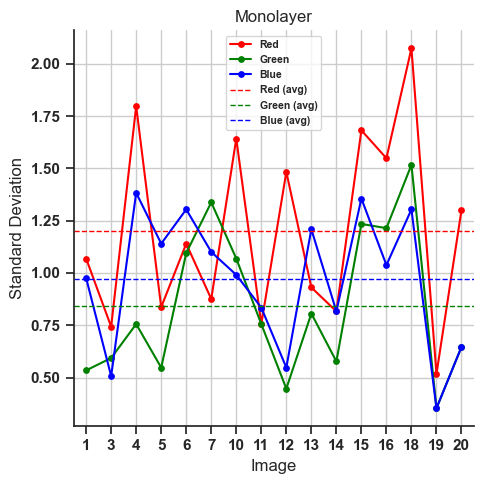

In [27]:
# Catplot STD vs Image for Monolayer
sns.catplot(data=std_df_mono_melted, x="Image", y="Standard Deviation", hue="Color Channel", 
            kind="point", palette=sns.color_palette(["Red", "Green", "Blue"]), linewidth=1.5, legend_out=False)
plt.axhline(y=std_df_mono.Red.mean(), color="Red", linewidth=1, linestyle='--', label="Red (avg)")
plt.axhline(y=std_df_mono.Green.mean(), color="Green", linewidth=1, linestyle='--', label="Green (avg)")
plt.axhline(y=std_df_mono.Blue.mean(), color="Blue", linewidth=1, linestyle='--', label="Blue (avg)")
plt.title("Monolayer")
plt.grid()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(fontsize=7.5, loc='best')
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\std_vs_image_mono.png", dpi=600)
plt.show()

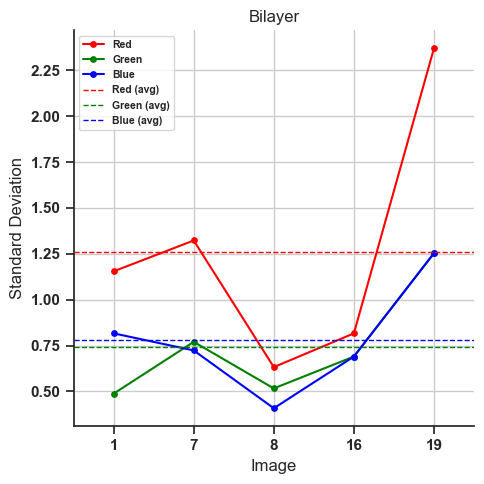

In [28]:
# Catplot STD vs Image for Bilayer
sns.catplot(data=std_df_bi_melted, x="Image", y="Standard Deviation", hue="Color Channel", 
            kind="point", palette=sns.color_palette(["Red", "Green", "Blue"]), linewidth=1.5, legend_out=False)
plt.axhline(y=std_df_bi.Red.mean(), color="Red", linewidth=1, linestyle='--', label="Red (avg)")
plt.axhline(y=std_df_bi.Green.mean(), color="Green", linewidth=1, linestyle='--', label="Green (avg)")
plt.axhline(y=std_df_bi.Blue.mean(), color="Blue", linewidth=1, linestyle='--', label="Blue (avg)")
plt.title("Bilayer")
plt.grid()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(fontsize=7.5, loc='best')
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\std_vs_image_bi.png", dpi=600)
plt.show()

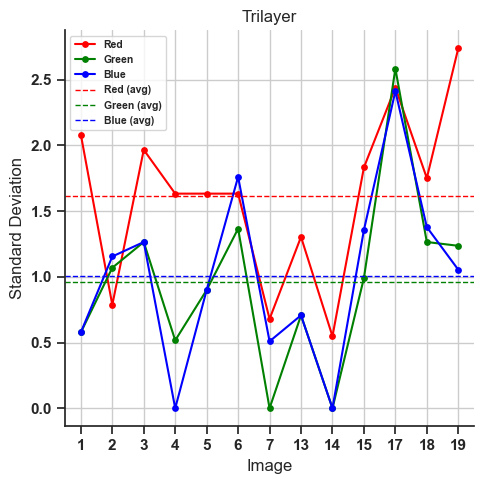

In [29]:
# Catplot STD vs Image for Trilayer
sns.catplot(data=std_df_tri_melted, x="Image", y="Standard Deviation", hue="Color Channel", 
            kind="point", palette=sns.color_palette(["Red", "Green", "Blue"]), linewidth=1.5, legend_out=False)
plt.axhline(y=std_df_tri.Red.mean(), color="Red", linewidth=1, linestyle='--', label="Red (avg)")
plt.axhline(y=std_df_tri.Green.mean(), color="Green", linewidth=1, linestyle='--', label="Green (avg)")
plt.axhline(y=std_df_tri.Blue.mean(), color="Blue", linewidth=1, linestyle='--', label="Blue (avg)")
plt.title("Trilayer")
plt.grid()
plt.legend(fontsize=7.5, loc='best')
plt.tight_layout()
#plt.savefig(pwd+"\\Plots\\std_vs_image_tri.png", dpi=600)
plt.show()